# 00: Data Check

## Import message data
See valid types (enforced in `schema.py`) and data is correctly imported by `loader.py`

In [ ]:
import lob_market_making_sim.io.loader as loader
pa_event_table = loader.lobster_to_arrow('../data/AMZN_2012-06-21_34200000_57600000_message_1.csv')
pa_event_table
len(pa_event_table)

pyarrow.Table
time: double
event_type: int32
order_id: int64
size: int64
price: int64
direction: int64
----
time: [[34200.017459617,34200.18960767,34200.190226476,34200.190226476,34200.372779672,...,44679.389309878,44679.389496864,44679.434999443,44679.434999443,44679.434999443],[44679.434999443,44679.435226668,44679.435252045,44679.435313602,44679.435573179,...,56101.791152281,56101.791235791,56101.791368644,56101.79151694,56101.792020466],[56101.832763457,56101.832856591,56101.832886807,56101.832993291,56102.297849832,...,57599.545827862,57599.545827862,57599.903989046,57599.958244616,57599.95935965]]
event_type: [[5,1,4,4,5,...,3,4,4,4,4],[4,3,1,1,1,...,1,3,3,4,3],[4,1,3,1,4,...,4,4,3,1,3]]
order_id: [[0,11885113,11885113,11534792,0,...,150185893,150185895,150139228,150088234,150181118],[150134397,150134397,150186473,150186474,150186478,...,260881461,260786048,260848394,260881461,260846676],[260881461,260881806,260853864,260881809,260881461,...,282917222,286916542,287142900,28717407

## Convert message data to OrderEvent
Ensure that data from Pyarrow table is correctly loaded into `Iterable[OrderEvent]`

In [2]:
order_events = loader.arrow_to_events(pa_event_table)

## Generate Parquet file from data

In [3]:
from lob_market_making_sim.io.store import ArrowStore
import lob_market_making_sim.io.schema as schema
my_arrow_store = ArrowStore(schema.COL_SCHEMA)
my_arrow_store.add_batch(pa_event_table)
my_arrow_store.flush('data/parquet/AMZN_2025-06-12.parquet')

PosixPath('data/parquet/AMZN_2025-06-12.parquet')

## Load Parquet, plot first 100 mid-prices, confirm timestamps monotone.

In [6]:
import pandas as pd
df = pd.read_parquet('data/parquet/AMZN_2025-06-12.parquet')
df

,time,event_type,order_id,size,price,direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.190226,4,11885113,21,2238100,1
3,34200.190226,4,11534792,26,2237500,1
4,34200.372780,5,0,100,2238400,-1
...,...,...,...,...,...,...
57510,57599.545828,4,282917222,9,2205100,1
57511,57599.545828,4,286916542,51,2205100,1
57512,57599.903989,3,287142900,100,2206200,-1
57513,57599.958245,1,287174077,100,2206300,-1


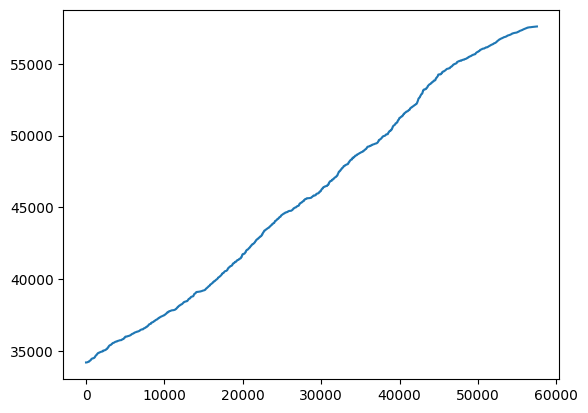

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['time']) # To check that timestamps are monotone